# **Plotting with Pandas**

## Setup

In [ ]:
%matplotlib inline # for us to not require adding .show()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
   'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')

## Evolution over time


<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

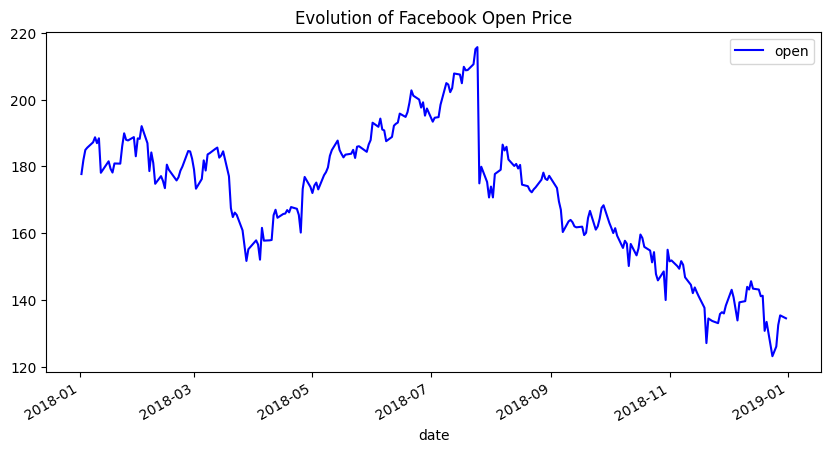

In [ ]:
fb.plot(
   kind='line', # kind = specifies kind
   y='open',
   figsize=(10, 5),
   style='b-', # line type
   legend=True, # shows legend
   title='Evolution of Facebook Open Price'
)


We provided the
style
 argument in the previous example; however, we can use the
color
 and
linestyle
 arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

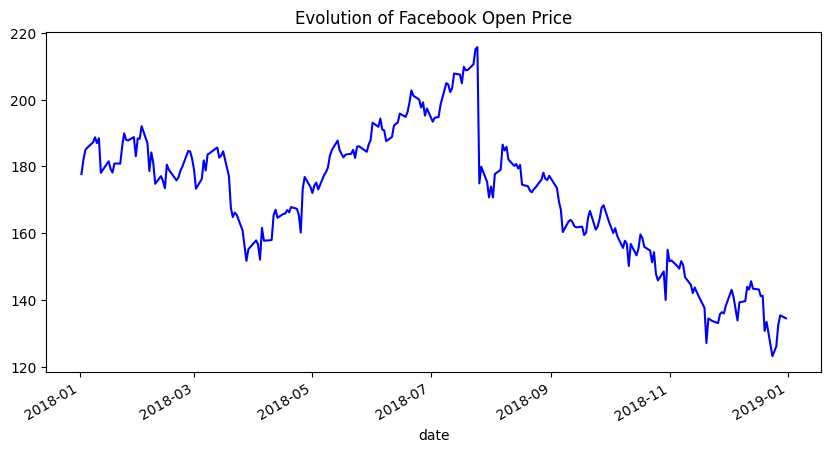

In [ ]:
fb.plot( # different approach but same result
   kind='line',
   y='open',
   figsize=(10, 5),
   color='blue',
   linestyle='solid',
   legend=False,
   title='Evolution of Facebook Open Price'
)

We can also plot many lines at once by simply passing a list of the columns to plot:

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

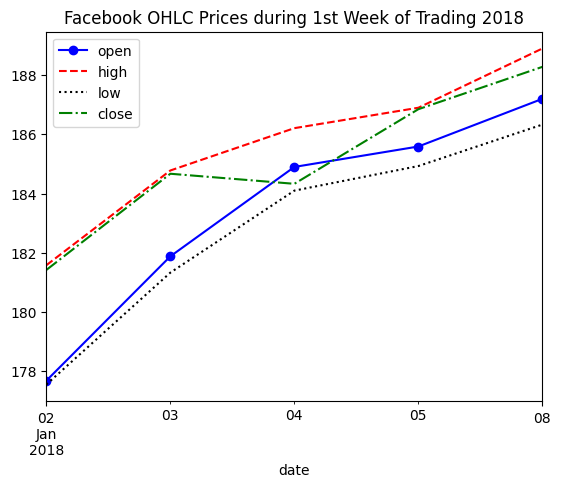

In [ ]:
fb.iloc[:5,].plot(
  y=['open', 'high', 'low', 'close'],
  style=['b-o', 'r--', 'k:', 'g-.'], # different styles
  title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

## Creating subplots

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

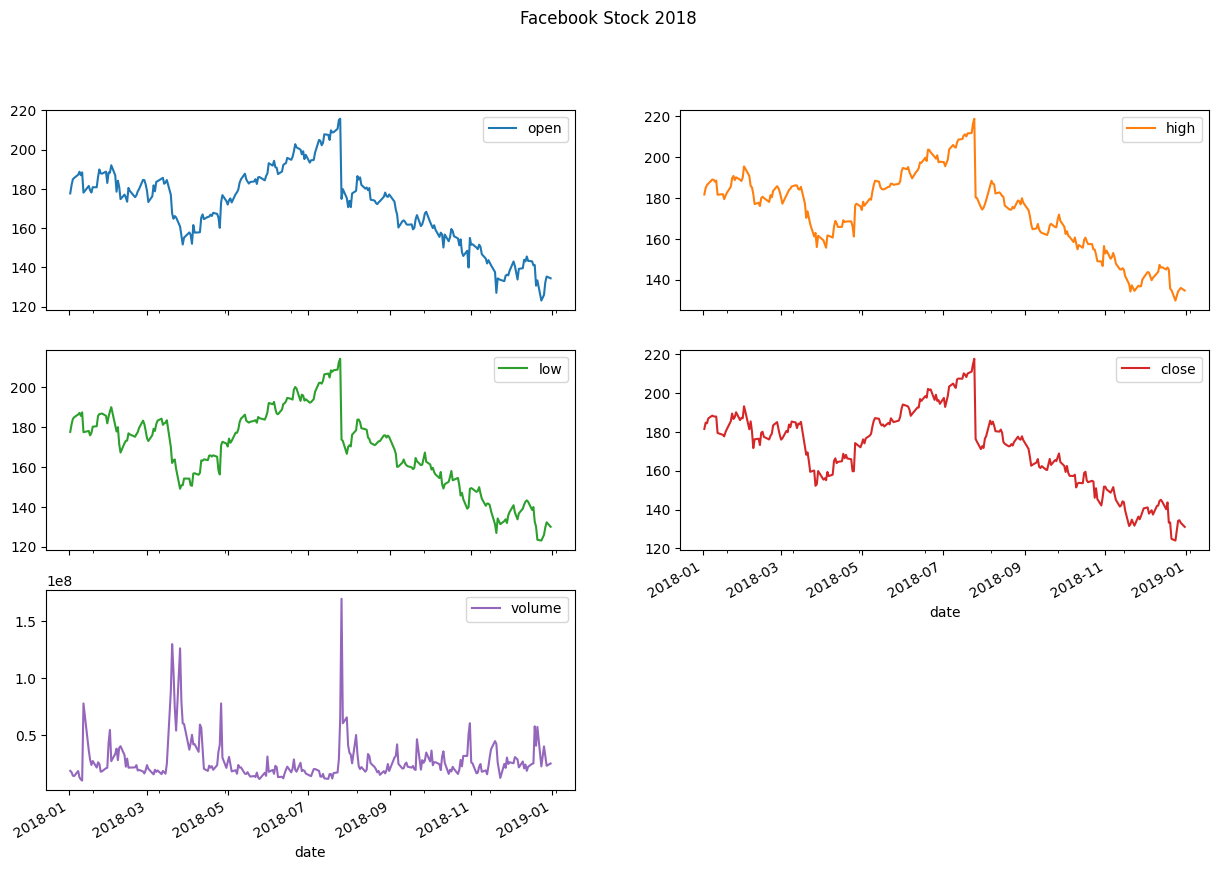

In [ ]:
fb.plot(
  kind='line',
  subplots=True, # simply pass it to plot
  layout=(3,2), # optional layout in a tuple of rows and columns
  figsize=(15,10),
  title='Facebook Stock 2018'
)

##  Visualizing relationships between variables


## Scatter plots

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

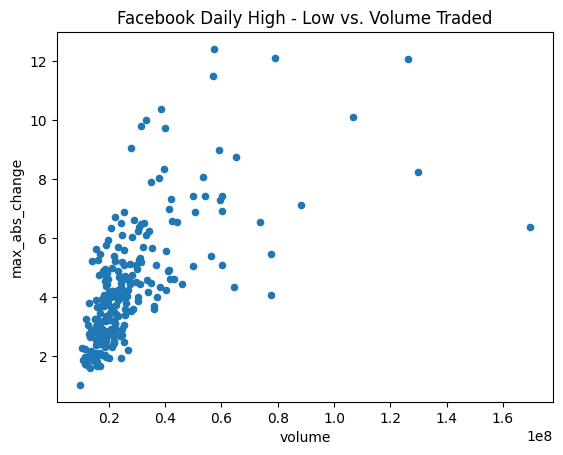

In [ ]:
fb.assign(
  max_abs_change=fb.high - fb.low # change in price by subtracting low from high
).plot(
  kind='scatter', x='volume', y='max_abs_change', # volume for x-axis while daily high-low for y-axis
  title='Facebook Daily High - Low vs. Volume Traded'
)

 The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in
 logx=True
:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

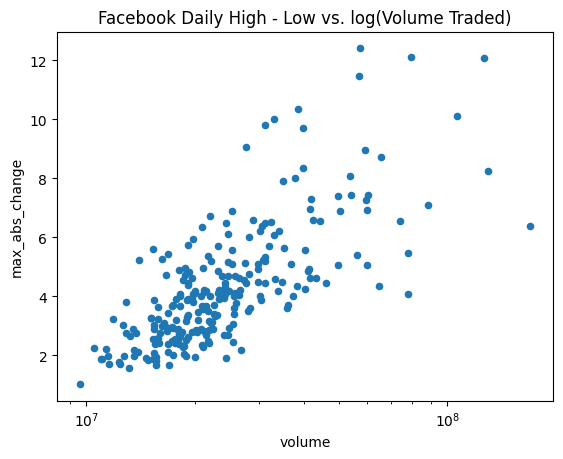

In [ ]:
fb.assign(
  max_abs_change=fb.high - fb.low
).plot(
  kind='scatter', x='volume', y='max_abs_change',
  title='Facebook Daily High - Low vs. log(Volume Traded)',
  logx=True
)


 With matplotlib, we could use
plt.xscale('log')
 to do the same thing.

## Adding Transparency to Plots with alpha

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

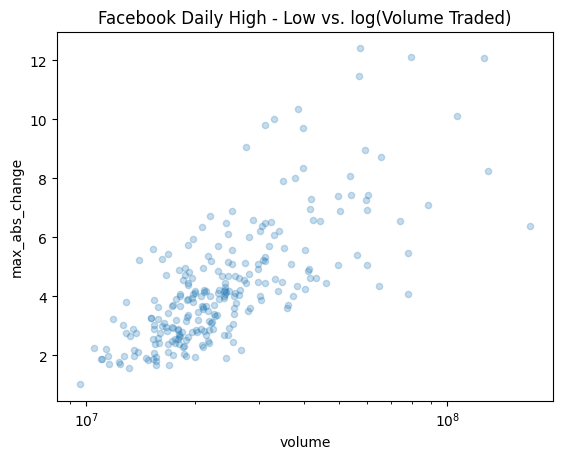

In [ ]:
fb.assign(
  max_abs_change=fb.high - fb.low
).plot(
  kind='scatter', x='volume', y='max_abs_change',
  title='Facebook Daily High - Low vs. log(Volume Traded)',
  logx=True, alpha = (0.25) # adds transparency to the plots
)

## Hexbins

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

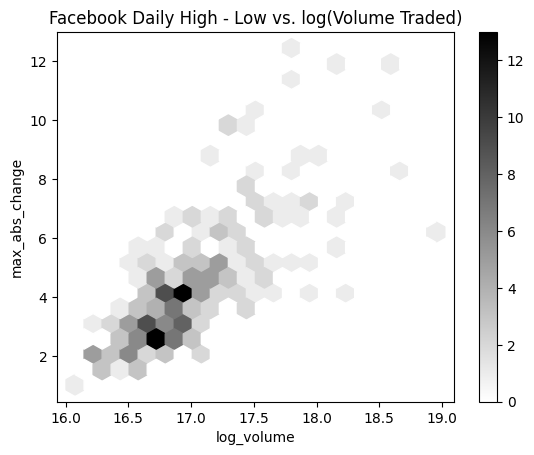

In [ ]:
fb.assign(
  log_volume=np.log(fb.volume),
  max_abs_change=fb.high - fb.low
).plot(
  kind='hexbin',
  x='log_volume',
  y='max_abs_change',
  title='Facebook Daily High - Low vs. log(Volume Traded)',
  colormap='gray_r',
  gridsize=20, # size per grid
  sharex=False
)

## Visualizing Correlations with Heatmaps

pandas dont offer heatmaps so we get our data in a matrix and use matshow() from matplotlib as an alternative

<ipython-input-27-46113212040d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, rotation=45)
<ipython-input-27-46113212040d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, 'open'),
 Text(0, 1.0, 'high'),
 Text(0, 2.0, 'low'),
 Text(0, 3.0, 'close'),
 Text(0, 4.0, 'volume'),
 Text(0, 5.0, 'log_volume'),
 Text(0, 6.0, 'max_abs_change'),
 Text(0, 7.0, '')]

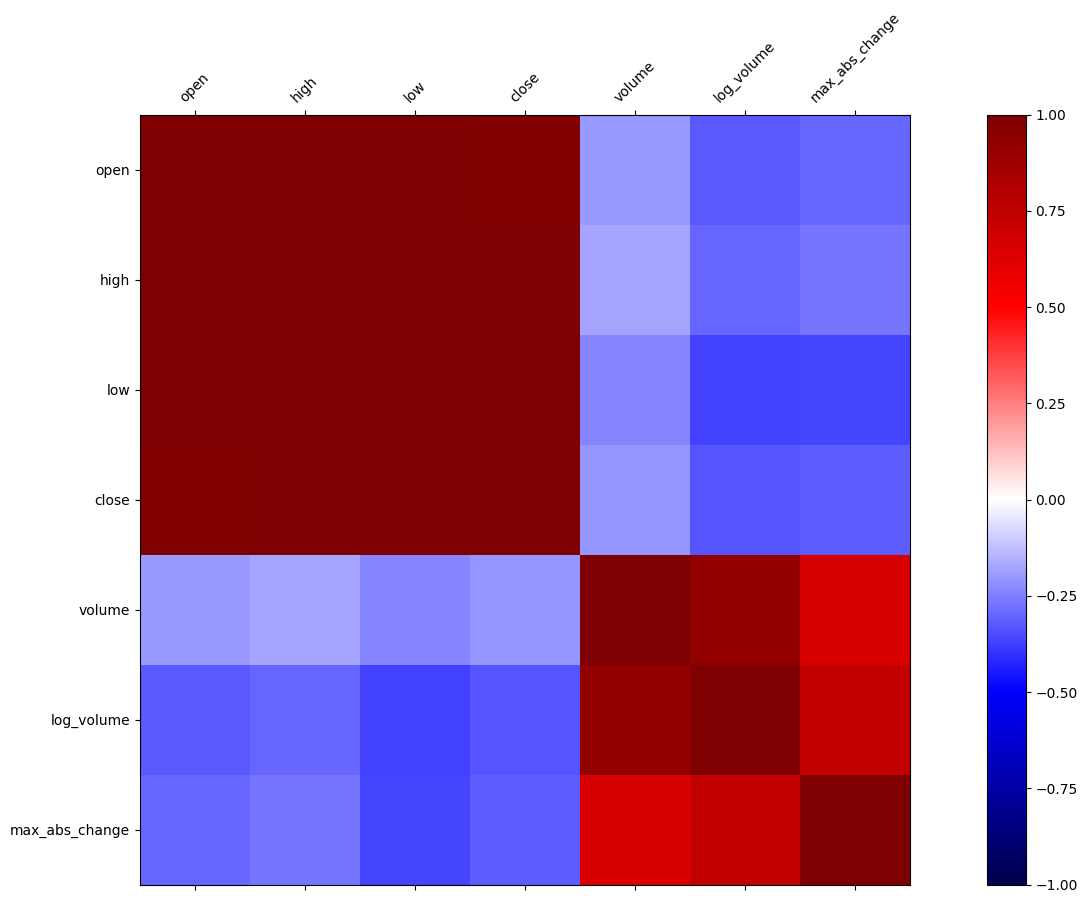

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(
  log_volume=np.log(fb.volume),
  max_abs_change=fb.high - fb.low
).corr() # corr() computes correlation

im = ax.matshow(fb_corr, cmap='seismic') #.matshow() for the plotting
fig.colorbar(im)

im.set_clim(-1, 1)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

In [ ]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']] # to access the correlation between the maximum absolute change to volumes and log volumes

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Visualizing distributions

Histograms
With the pandas
 plot()
 method, making histograms is as easy as passing in
kind='hist'
:

Text(0.5, 0, 'Volume traded')

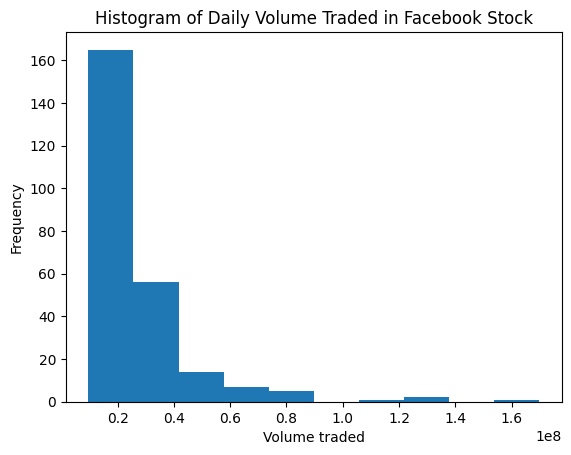

In [ ]:
fb.volume.plot(
  kind='hist',
  title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'magnitude')

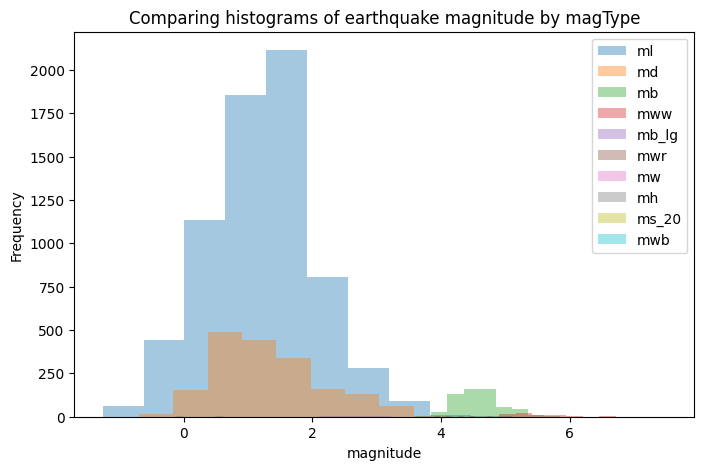

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
  data = quakes.query(f'magType == "{magtype}"').mag
  if not data.empty:
    data.plot(
      kind='hist', ax=axes, alpha=0.4,
      label=magtype, legend=True,
      title='Comparing histograms of earthquake magnitude by magType'
    )
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

## Kernel Density Estimation (KDE)

We can pass
kind='kde'
 for a probability density function (PDF), which tells us the probability of getting a particular value

Text(0.5, 0, 'Price ($)')

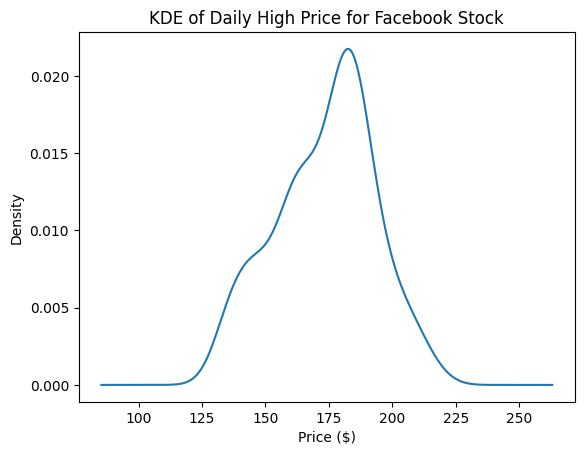

In [ ]:
fb.high.plot(
  kind='kde',
  title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

## Adding to the result of plot()

Text(0.5, 0, 'Price ($)')

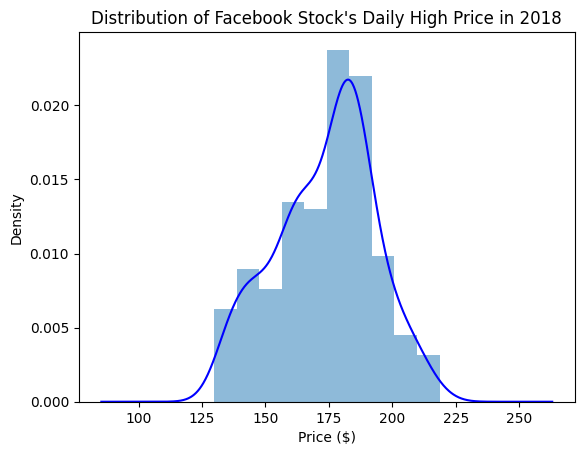

In [ ]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
  ax=ax, kind='kde', color='blue',
  title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

## Plotting the ECDF

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

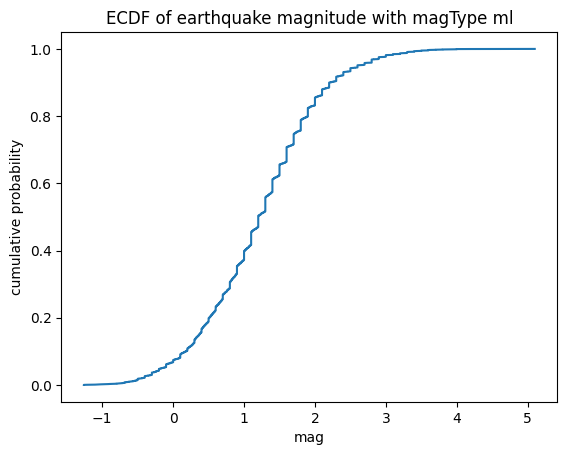

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the
ml
 scale is 98%

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

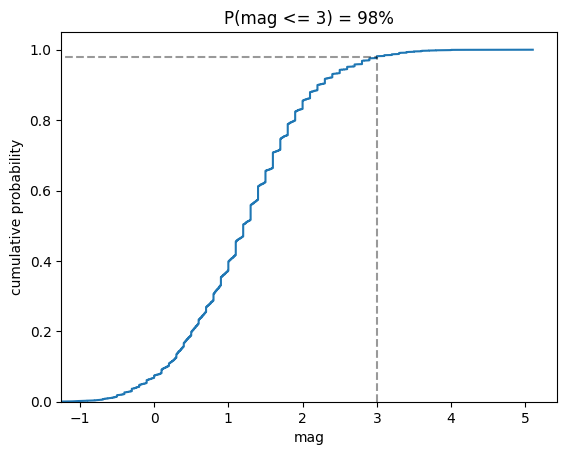

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
    [3, 3], [0, .98], 'k--',
    [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)
# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')

## Box Plots
To make box plots with pandas, we pass
 kind='box'
 to the
plot()
 method:

Text(0, 0.5, 'price ($)')

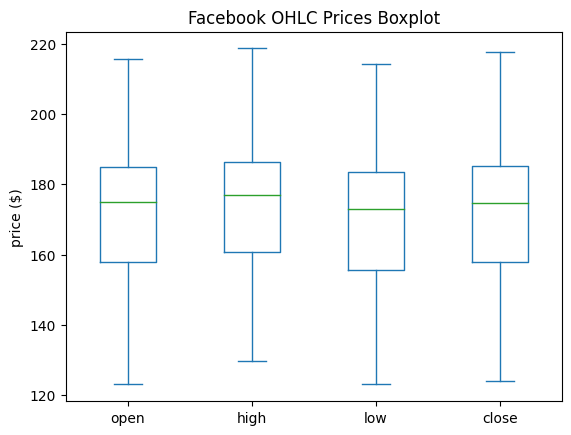

In [ ]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)


This can also be combined with a
groupby()
:

Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

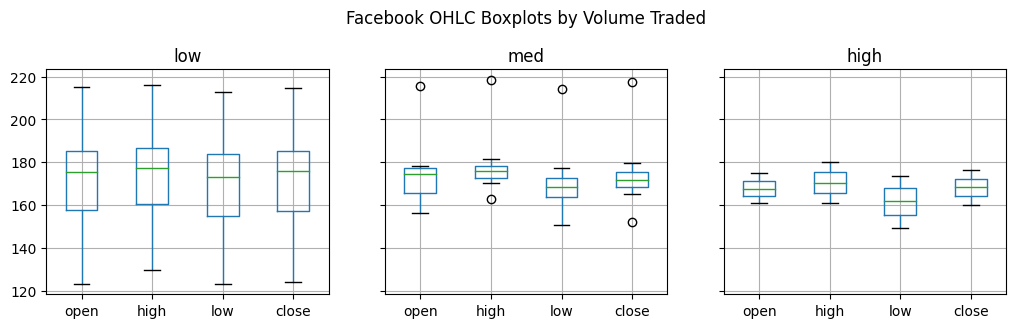

In [ ]:
fb.assign(
  volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high']) # binning low medium high
).groupby('volume_bin').boxplot( # implemening groupby() for showcasing the ohlc boxplots
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

 We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

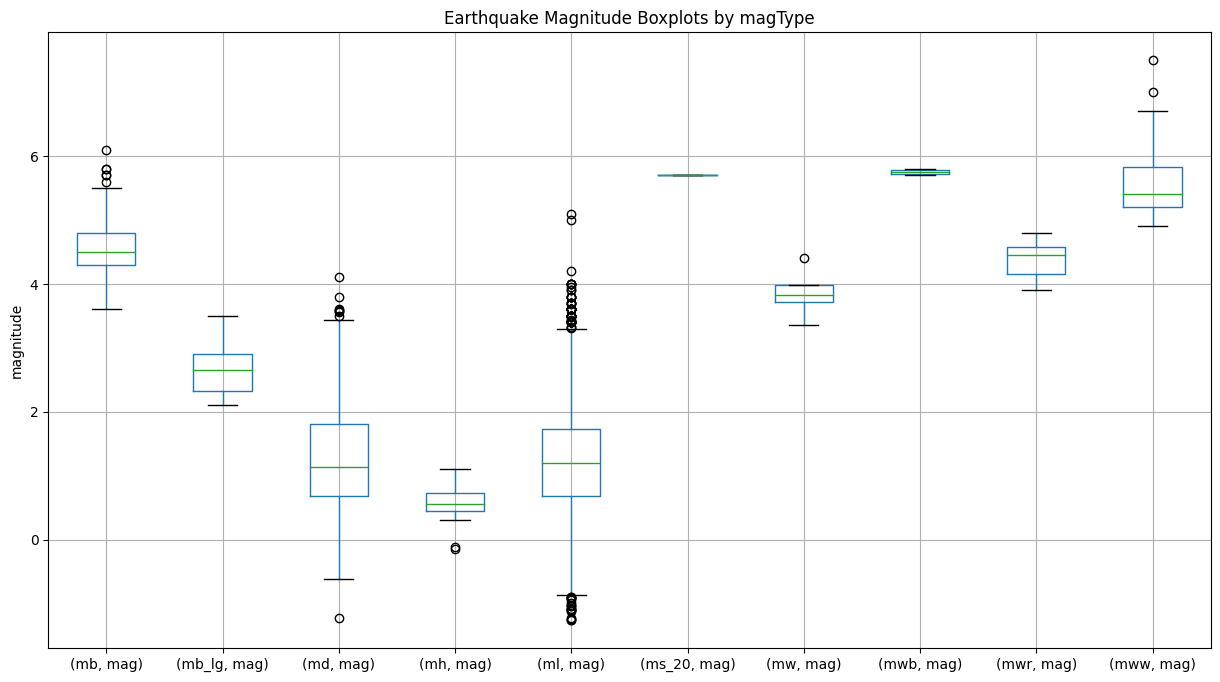

In [ ]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
  figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

## Counts and frequencies

## Bar charts

Text(0, 0.5, 'volume')

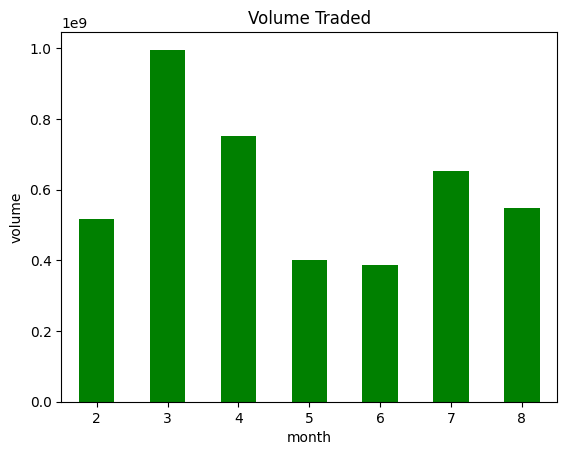

In [ ]:
fb['2018-02':'2018-08'].assign(
  month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
  color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume') # label the y-axis (discussed in chapter 6)

different approach using barh

Text(0.5, 0, 'earthquakes')

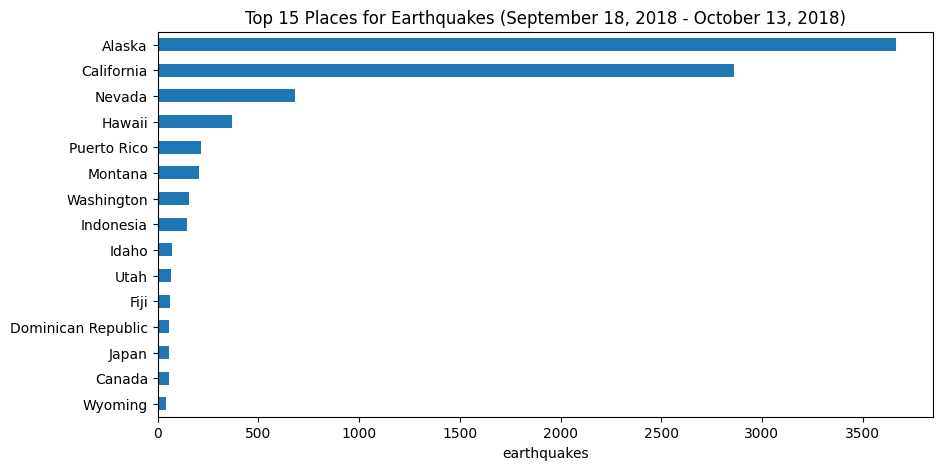

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
  kind='barh', figsize=(10, 5),
  title='Top 15 Places for Earthquakes '\
  '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

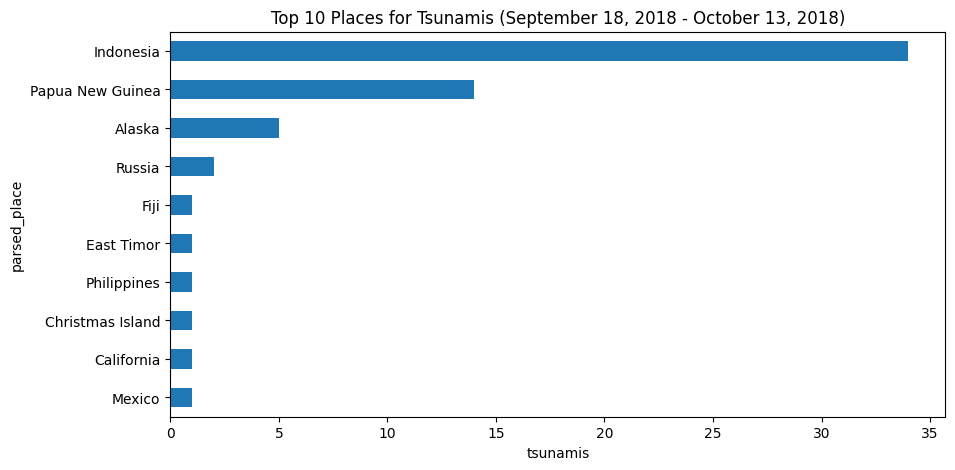

In [ ]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
  kind='barh', figsize=(10, 5),
  title='Top 10 Places for Tsunamis '\
  '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a
 daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here

<ipython-input-53-a247e4f26079>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).set_index('time').resample('1D').sum()


Text(0, 0.5, 'count')

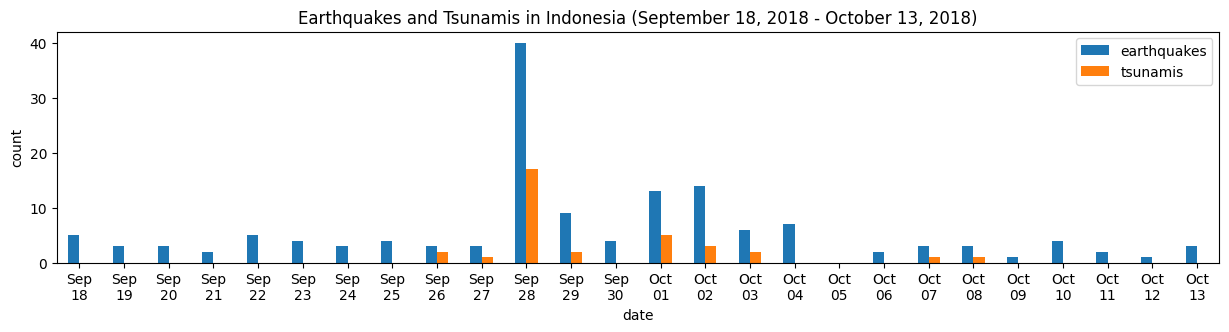

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign( # get the indonesia earthquakes
   time=lambda x: pd.to_datetime(x.time, unit='ms'), # convert time to datetimeformat
   earthquake=1
).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d') #b for the month \n for newline and %d for the day
indonesia_quakes.plot(
   y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0, #rot=0 means 0 rotation
   label=['earthquakes', 'tsunamis'],
   title='Earthquakes and Tsunamis in Indonesia '\
       '(September 18, 2018 - October 13, 2018)'
)
# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Using the
kind argument for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

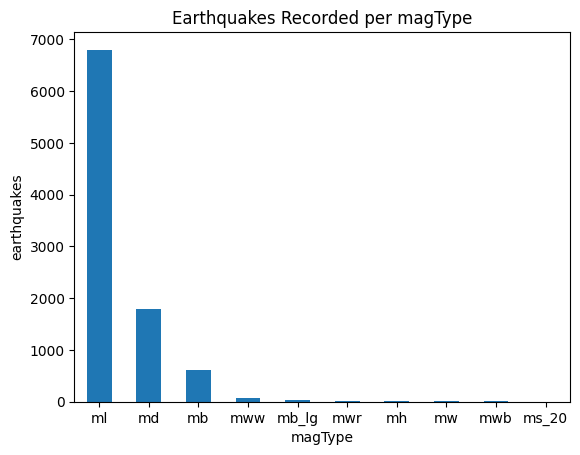

In [ ]:
quakes.magType.value_counts().plot(
  kind='bar', title='Earthquakes Recorded per magType', rot=0
)
# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

Top 4 places with earthquakes:

Text(0, 0.5, 'earthquakes')

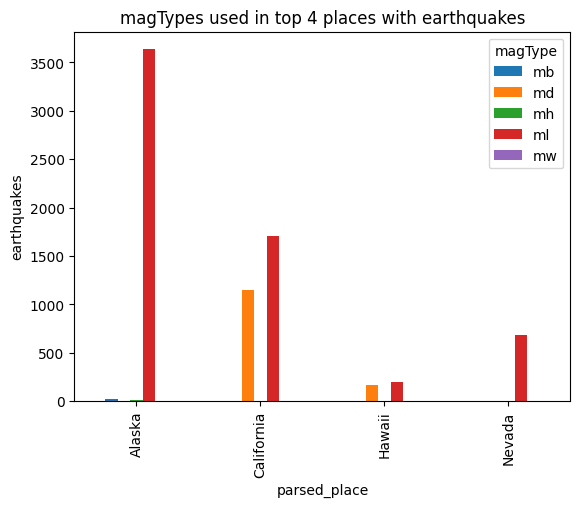

In [ ]:
quakes[ # unstacked bars display multiple bars for each category side-by-side
   quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
   title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

##  Stacked bar chart


Text(0, 0.5, 'earthquakes')

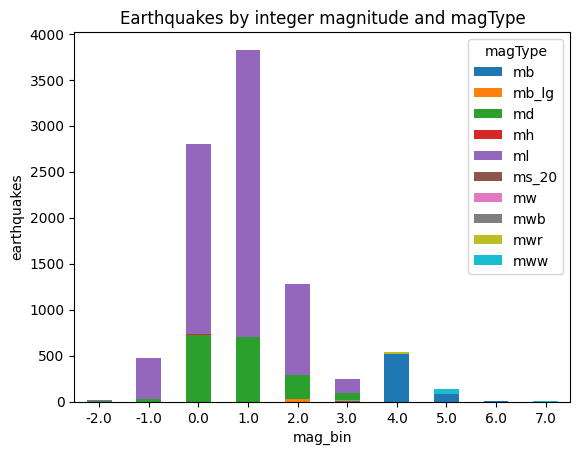

In [ ]:
pivot = quakes.assign( # stacked bars are conjoined data into single bars
   mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
   index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
   stacked=True, rot=0,
   title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)


##  Normalized stacked bars


 Plot the percentages to be better able to see the different
magTypes


Text(0, 0.5, 'percentage')

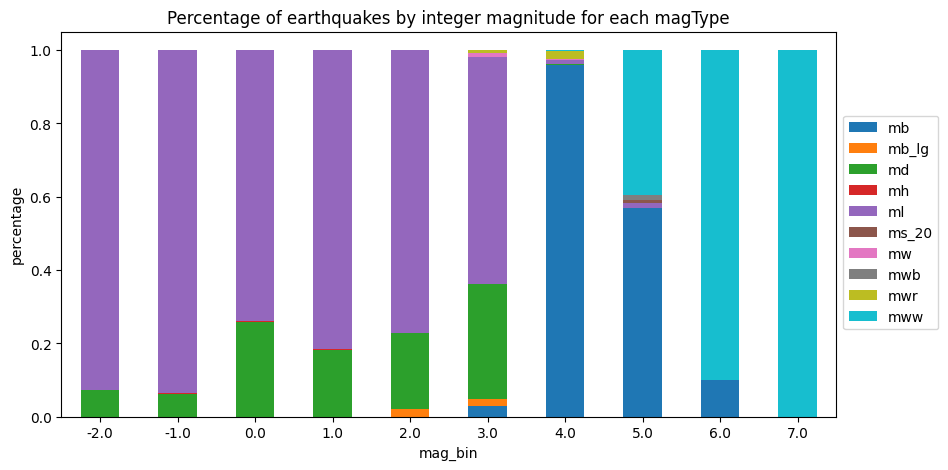

In [ ]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1) # in normalized stacked bars, # the height is normalized to 100%
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)